# 任务2：torchvision预训练模型测试真实图像分类

**任务要求：利用torchvision中的预训练CNN模型来对真实的图像进行分类，预测每张图片的top5类别。**  
**数据: real_image, class_index.json**

In [1]:
import torch
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
use_gpu = True if torch.cuda.is_available() else False
print('Use GPU:', use_gpu)

Use GPU: False


## 1. 类别索引

构建类别索引词典

In [3]:
f = open('./data/class_index.json')
class_index = json.load(f)
print('class num:', len(class_index))
class_dict = {int(k): v[1] for k, v in class_index.items()}
#'''print(class_dict)'''

class num: 1000


### 2. 预训练模型

加载预训练CNN模型

In [4]:
''' 请在下方编写加载torchvision预训练模型代码(可用多个模型) '''
resnet50 = models.resnet50(pretrained=True)
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 3. 图像预处理

图像缩放、裁剪、转Tensor、归一化

In [5]:
''' 请在下方编写图像预处理转换代码 '''
image_transforms = transforms.Compose([
    transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

### 4. 测试数据集加载

构建测试数据集，迭代返回预处理后的Tensor格式图像和原始图像

In [6]:
class TestDataset():
    def __init__(self, root, transforms=None):
        imgs = os.listdir(root)
        self.imgs = [os.path.join(root, img) for img in imgs]
        self.transforms = transforms
        
    def __getitem__(self, index):
        img_path = self.imgs[index]
        img_pil = Image.open(img_path)
        img_np = np.asarray(img_pil)
        data = self.transforms(img_pil)
        return data, img_np
    
    def __len__(self):
        return len(self.imgs)

In [7]:
test_dir = './data/real_image/'
test_dataset = TestDataset(test_dir, image_transforms)
print('test image num:', test_dataset.__len__())

test image num: 20


### 5. 模型预测图像类别

在测试模式下，对于每张图片显示原始图像，并输出模型预测的top5类别及top1类别

Image No. 1


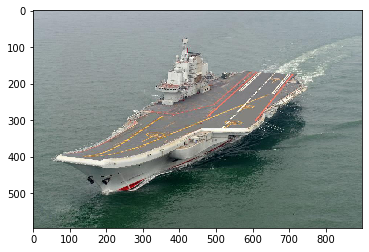

Top 1:
aircraft_carrier , Score 24.47150993347168

Top 5:
aircraft_carrier , Score = 24.47150993347168
container_ship , Score = 16.299240112304688
drilling_platform , Score = 14.76909351348877
fireboat , Score = 14.453640937805176
dock , Score = 14.419857025146484


Image No. 2


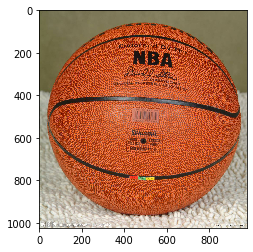

Top 1:
basketball , Score 29.8515567779541

Top 5:
basketball , Score = 29.8515567779541
rugby_ball , Score = 17.939895629882812
volleyball , Score = 15.99146842956543
soccer_ball , Score = 13.472926139831543
punching_bag , Score = 10.950981140136719


Image No. 3


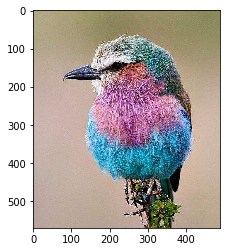

Top 1:
bee_eater , Score 14.688246726989746

Top 5:
bee_eater , Score = 14.688246726989746
indigo_bunting , Score = 11.692626953125
jacamar , Score = 9.536869049072266
lorikeet , Score = 9.119629859924316
jay , Score = 9.048126220703125


Image No. 4


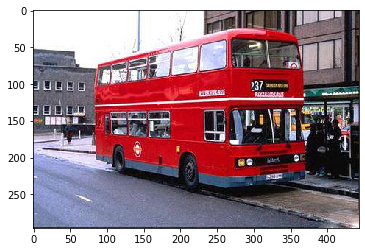

Top 1:
trolleybus , Score 12.748340606689453

Top 5:
trolleybus , Score = 12.748340606689453
passenger_car , Score = 11.825607299804688
minibus , Score = 9.519455909729004
fire_engine , Score = 8.192748069763184
school_bus , Score = 7.619413375854492


Image No. 5


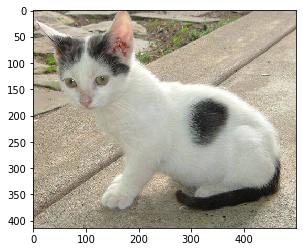

Top 1:
Egyptian_cat , Score 7.330174922943115

Top 5:
Egyptian_cat , Score = 7.330174922943115
tabby , Score = 5.842981338500977
Siamese_cat , Score = 5.7187299728393555
bucket , Score = 5.406617164611816
weasel , Score = 5.139024257659912


Image No. 6


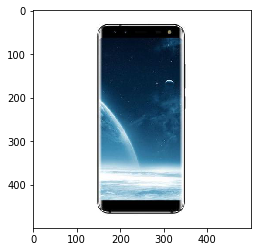

Top 1:
cellular_telephone , Score 11.116266250610352

Top 5:
cellular_telephone , Score = 11.116266250610352
lighter , Score = 11.04728889465332
iPod , Score = 8.954361915588379
mouse , Score = 8.727593421936035
desktop_computer , Score = 8.328621864318848


Image No. 7


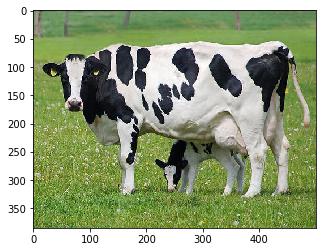

Top 1:
ox , Score 15.861442565917969

Top 5:
ox , Score = 15.861442565917969
oxcart , Score = 12.761815071105957
plow , Score = 10.696052551269531
Great_Dane , Score = 9.842815399169922
ram , Score = 8.29718017578125


Image No. 8


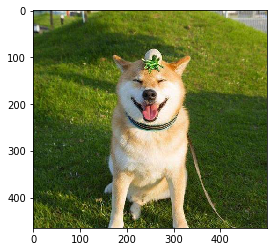

Top 1:
Eskimo_dog , Score 10.92797565460205

Top 5:
Eskimo_dog , Score = 10.92797565460205
Siberian_husky , Score = 10.636853218078613
dingo , Score = 10.438048362731934
malamute , Score = 9.592174530029297
German_shepherd , Score = 9.092602729797363


Image No. 9


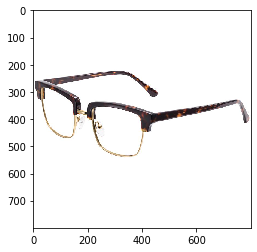

Top 1:
sunglass , Score 9.0440092086792

Top 5:
sunglass , Score = 9.0440092086792
sunglasses , Score = 9.02485466003418
loupe , Score = 7.986931800842285
microphone , Score = 6.33298397064209
stethoscope , Score = 6.245803356170654


Image No. 10


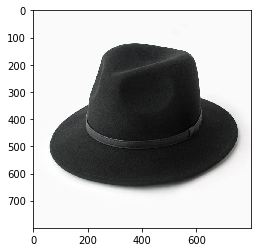

Top 1:
cowboy_hat , Score 30.600313186645508

Top 5:
cowboy_hat , Score = 30.600313186645508
sombrero , Score = 29.88008689880371
bearskin , Score = 13.157002449035645
bonnet , Score = 11.246489524841309
wool , Score = 11.023923873901367


Image No. 11


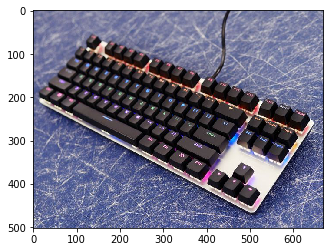

Top 1:
space_bar , Score 11.440851211547852

Top 5:
space_bar , Score = 11.440851211547852
computer_keyboard , Score = 11.10171127319336
typewriter_keyboard , Score = 10.718914985656738
mouse , Score = 8.161449432373047
notebook , Score = 7.908287525177002


Image No. 12


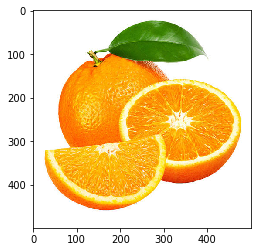

Top 1:
orange , Score 25.050600051879883

Top 5:
orange , Score = 25.050600051879883
lemon , Score = 19.247343063354492
banana , Score = 13.981856346130371
strawberry , Score = 10.932107925415039
pineapple , Score = 10.026700973510742


Image No. 13


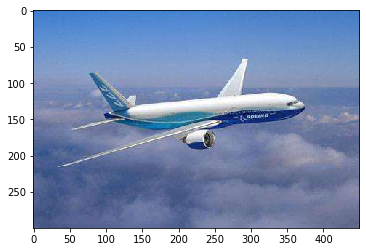

Top 1:
airliner , Score 17.086074829101562

Top 5:
airliner , Score = 17.086074829101562
wing , Score = 13.613531112670898
warplane , Score = 11.586122512817383
airship , Score = 10.940372467041016
projectile , Score = 10.203554153442383


Image No. 14


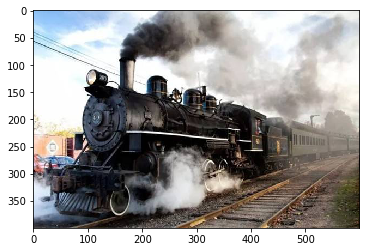

Top 1:
steam_locomotive , Score 24.881555557250977

Top 5:
steam_locomotive , Score = 24.881555557250977
electric_locomotive , Score = 14.104427337646484
passenger_car , Score = 13.755176544189453
tank , Score = 12.76296615600586
thresher , Score = 11.941739082336426


Image No. 15


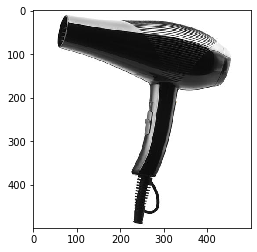

Top 1:
hand_blower , Score 21.1152286529541

Top 5:
hand_blower , Score = 21.1152286529541
microphone , Score = 13.12353801727295
corkscrew , Score = 11.385981559753418
can_opener , Score = 10.084619522094727
dial_telephone , Score = 9.961865425109863


Image No. 16


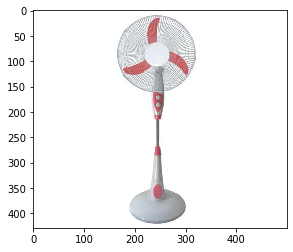

Top 1:
electric_fan , Score 19.487653732299805

Top 5:
electric_fan , Score = 19.487653732299805
racket , Score = 9.787314414978027
microphone , Score = 9.773300170898438
strainer , Score = 9.338220596313477
table_lamp , Score = 9.323349952697754


Image No. 17


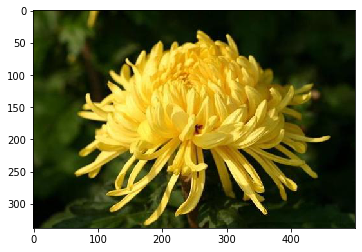

Top 1:
sea_anemone , Score 10.220513343811035

Top 5:
sea_anemone , Score = 10.220513343811035
coral_fungus , Score = 9.988968849182129
daisy , Score = 9.234607696533203
sea_slug , Score = 7.874671459197998
bee , Score = 7.308218955993652


Image No. 18


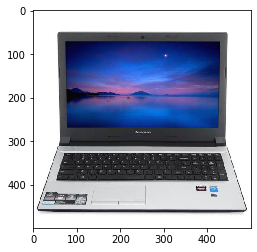

Top 1:
notebook , Score 15.099202156066895

Top 5:
notebook , Score = 15.099202156066895
laptop , Score = 13.576458930969238
desktop_computer , Score = 11.955212593078613
space_bar , Score = 11.736172676086426
hand-held_computer , Score = 11.568964958190918


Image No. 19


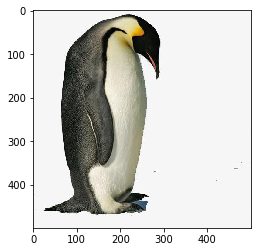

Top 1:
king_penguin , Score 15.455267906188965

Top 5:
king_penguin , Score = 15.455267906188965
guenon , Score = 7.009890079498291
toucan , Score = 6.871194362640381
albatross , Score = 5.890629291534424
hornbill , Score = 5.418633460998535


Image No. 20


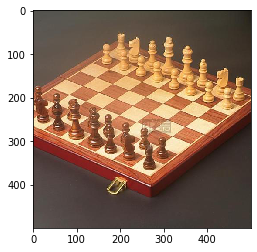

Top 1:
abacus , Score 12.849860191345215

Top 5:
abacus , Score = 12.849860191345215
joystick , Score = 10.920742988586426
tray , Score = 9.74267292022705
candle , Score = 8.805456161499023
dining_table , Score = 8.511021614074707




In [8]:
''' 请在下方编写模型在【测试模式】下，输出显示每个测试图像的原始图像及模型对应预测的top5和top1类别 '''
resnet50.eval()
def takeSecond(elem):
    return elem[1]

for i in range(20):
    print("Image No.",i+1);
    plt.imshow(test_dataset.__getitem__(i)[1])
    plt.show()
    out = resnet50(torch.unsqueeze(test_dataset.__getitem__(i)[0],0))
    res_list=out[0].tolist()
    sort_list=[]
    for i in range(1000):
        temp=[i,res_list[i]];
        sort_list.append(temp);
    sort_list.sort(reverse=True,key=takeSecond)
    print("Top 1:")
    print(class_dict[sort_list[0][0]],", Score",sort_list[0][1],end='\n\n')
    print("Top 5:")
    for i in range(5):
        print(class_dict[sort_list[i][0]],end='')
        print(" , Score =",sort_list[i][1])
    print("\n")
   
        
        




